##Question 1 - Anything you can say what this dataset is about

##Answer:
This dataset captures player participation in game matches. The dataset contains one row per player per match with each row telling us:
*   Which player (PLAYERID) played in which match (MATCHID)
*   Which team they were on (TEAM)
*   How long the match lasted (DURATION in seconds)
*   Whether they won or lost (VICTORY)
*   Match date (MATCHDATEID)
*   Whether they are still an active player today (STILL_ACTIVE)

This can be used to analyze player performance, win/loss statistics, churn prediction.

In [7]:
# Load the data
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Ubisoft_Project/player_match_sample.csv')

df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PLAYERID,MATCHID,TEAM,DURATION,VICTORY,MATCHDATEID,STILL_ACTIVE
0,11664,290014,B,1344319,1,20250804,True
1,12905,234898,A,1326880,0,20250804,False
2,14122,171447,B,2107402,1,20250804,False
3,14217,248885,B,1027924,0,20250804,True
4,13799,199453,A,1308102,0,20250804,True
5,10943,187185,B,2689682,1,20250804,True
6,14559,69451,A,1743721,0,20250804,False
7,13615,84213,B,2172422,1,20250804,True
8,15384,149692,B,1255799,1,20250804,True
9,15607,376709,A,1757775,1,20250804,False


##Question 2 - What the dataset tells you about the game matches & q3: How would you asses data quality ? Any anomaly or outlier you can detect

##Answer:

*   No missing values found.
*   No duplicate rows.
*   The match durations vary significantly. The feature DURATION has extremely large values for a "match duration". If duration is in seconds 2,689,682 seconds = 31 days, not realistic. This is a likely data quality issue or the duration column means something else. Maybe player time spent in-game across multiple rounds.
*   Wins/losses appear almost balanced in this dataset.
*   Same MATCHID appears for multiple players, confirming a “one row per player per match” structure

In [13]:
df.describe(include='all')

,PLAYERID,MATCHID,TEAM,DURATION,VICTORY,MATCHDATEID,STILL_ACTIVE
count,655722.000000,655722.000000,655722,6.557220e+05,655722.000000,6.557220e+05,655722
unique,NaN,NaN,3,NaN,NaN,NaN,2
top,NaN,NaN,A,NaN,NaN,NaN,True
freq,NaN,NaN,336824,NaN,NaN,NaN,511664
mean,13185.740489,274088.281709,NaN,1.594244e+06,0.503277,2.025082e+07,NaN
std,1824.132891,156573.861552,NaN,9.952601e+07,0.499990,1.666168e+01,NaN
min,10001.000000,1000.000000,NaN,0.000000e+00,0.000000,2.025080e+07,NaN
25%,11622.000000,138355.250000,NaN,7.913800e+05,0.000000,2.025081e+07,NaN
50%,13208.000000,274523.500000,NaN,1.133075e+06,1.000000,2.025082e+07,NaN
75%,14738.000000,408908.750000,NaN,1.517532e+06,1.000000,2.025082e+07,NaN


In [23]:
df['PLAYERID'].value_counts()

,count
PLAYERID,
13261,1066
10931,792
12567,724
12193,684
13068,589
...,...
14946,1
10087,1
11964,1


In [24]:
df['MATCHID'].value_counts()

,count
MATCHID,
490416,12
182247,11
67021,11
199525,10
184017,10
...,...
106195,1
533582,1
124610,1


In [25]:
df[['PLAYERID', 'MATCHID']].value_counts()

PLAYERID  MATCHID
10941     218268     2
11973     300268     2
11746     401916     2
14308     199751     2
13531     266348     2
                    ..
12148     75985      1
          88099      1
          90496      1
          93581      1
          31337      1
Name: count, Length: 655717, dtype: int64

In [26]:
df[['MATCHID', 'PLAYERID']].value_counts()

MATCHID  PLAYERID
218268   10941       2
401916   11746       2
300268   11973       2
199751   14308       2
266348   13531       2
                    ..
184036   14142       1
184037   13154       1
         15182       1
184038   10415       1
184033   14251       1
Name: count, Length: 655717, dtype: int64

In [14]:
df['VICTORY'].value_counts()

,count
VICTORY,
1,330010
0,325712


In [12]:
df['TEAM'].value_counts()

,count
TEAM,
A,336824
B,318149
X,749


In [15]:
# Missing values
df.isna().sum()

,0
PLAYERID,0
MATCHID,0
TEAM,0
DURATION,0
VICTORY,0
MATCHDATEID,0
STILL_ACTIVE,0


In [19]:
print(len(df))
# Duplicate rows
df.duplicated().sum()
df1 = df.drop_duplicates()
len(df1)

655722


655722

##Q4: Compute all players win lose ratio and display distribution

##Answer: the distribution is centered ~0.5 which reflects that there is balanced matchmaking in this dataset.

In [29]:
# Compute wins and losses per player
player_stats = df.groupby('PLAYERID').agg(
    wins=('VICTORY','sum'),
    losses=('VICTORY', lambda x: (1 - x).sum()),
    total_matches=('VICTORY','count')
)

# Win ratio
player_stats['win_ratio'] = player_stats['wins'] / player_stats['total_matches']
player_stats.head()

,wins,losses,total_matches,win_ratio
PLAYERID,,,,
10001,65,44,109,0.596330
10002,64,65,129,0.496124
10003,69,103,172,0.401163
10004,55,28,83,0.662651
10005,142,223,365,0.389041


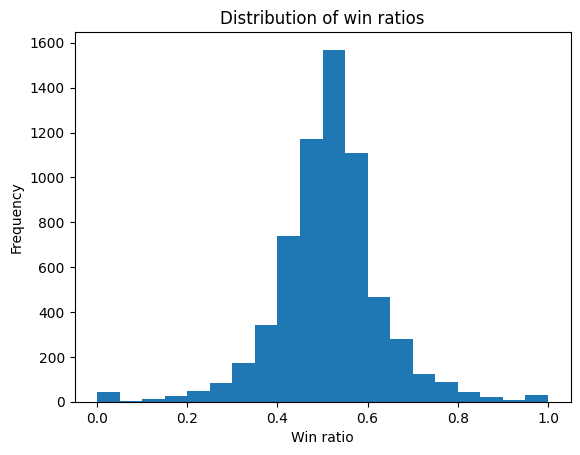

In [30]:
#Distribution Plot
import matplotlib.pyplot as plt

plt.hist(player_stats['win_ratio'], bins=20)
plt.title("Distribution of win ratios")
plt.xlabel("Win ratio")
plt.ylabel("Frequency")
plt.show()

##Q5: Compute all players max defeat and victory in a row

##Answer:

In [31]:
# Sort by player and date
df_sorted = df.sort_values(['PLAYERID','MATCHDATEID'])

def compute_streaks(x):
    victories = x['VICTORY'].values
    max_win = 0
    max_loss = 0
    cur_win = 0
    cur_loss = 0

    for v in victories:
        if v == 1:
            cur_win += 1
            max_win = max(max_win, cur_win)
            cur_loss = 0
        else:
            cur_loss += 1
            max_loss = max(max_loss, cur_loss)
            cur_win = 0
    return pd.Series({'max_win_streak': max_win, 'max_loss_streak': max_loss})

streaks = df_sorted.groupby('PLAYERID').apply(compute_streaks)
streaks.head()


/tmp/ipython-input-3274687734.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  streaks = df_sorted.groupby('PLAYERID').apply(compute_streaks)


,max_win_streak,max_loss_streak
PLAYERID,,
10001,16,4
10002,6,6
10003,5,14
10004,6,3
10005,8,15


##Q6: Compute other players features you think are relevant and keep all players features in a dataframe


In [32]:
# Merge features together
final_features = player_stats.join(streaks)

# Add average duration
avg_duration = df.groupby('PLAYERID')['DURATION'].mean().rename('avg_duration')
final_features = final_features.join(avg_duration)

# Add still_active
active = df.groupby('PLAYERID')['STILL_ACTIVE'].max()
final_features = final_features.join(active)

final_features.head()


,wins,losses,total_matches,win_ratio,max_win_streak,max_loss_streak,avg_duration,STILL_ACTIVE
PLAYERID,,,,,,,,
10001,65,44,109,0.596330,16,4,1.063395e+06,False
10002,64,65,129,0.496124,6,6,1.541999e+06,True
10003,69,103,172,0.401163,5,14,1.046807e+06,True
10004,55,28,83,0.662651,6,3,1.532930e+06,True
10005,142,223,365,0.389041,8,15,6.489016e+05,True
